In [142]:
# Loading Libraries

import numpy as np
import pandas as pd
pd.options.display.max_columns = 150

from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.impute import KNNImputer
from sklearn.utils import resample
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from joblib import dump, load
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
from mrmr import mrmr_classif
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score, make_scorer, balanced_accuracy_score, precision_score

In [430]:
df = pd.read_csv('heart.csv')

In [356]:
#X = df.copy()
X.corr()

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
Age,1.000000,0.060874,0.253845,-0.098892,0.199335,-0.380995,0.218418,0.257106,0.287545,0.178421,-0.224500,-0.012666,0.017849,0.145120,-0.232982,0.140379,0.134286,0.186027,-0.256654
Sex,0.060874,1.000000,0.006477,-0.203832,0.121923,-0.189231,0.190630,0.110896,0.308028,0.180701,-0.160685,-0.067206,0.002422,-0.044489,-0.011114,0.059086,0.075017,0.117082,-0.156672
RestingBP,0.253845,0.006477,1.000000,0.101311,0.065221,-0.112345,0.148524,0.155092,0.103948,0.044026,-0.036921,-0.041195,0.044417,0.048729,-0.118180,0.096563,-0.012655,0.095002,-0.089501
Cholesterol,-0.098892,-0.203832,0.101311,1.000000,-0.254118,0.236748,-0.036284,0.048683,-0.236296,-0.120678,0.152749,-0.008022,0.018275,0.175756,-0.040926,-0.128461,-0.084775,-0.059750,0.103745
FastingBS,0.199335,0.121923,0.065221,-0.254118,1.000000,-0.132171,0.057962,0.052468,0.268438,0.127253,-0.136191,-0.035807,0.021117,-0.012594,-0.087090,0.120586,0.109259,0.113139,-0.170211
MaxHR,-0.380995,-0.189231,-0.112345,0.236748,-0.132171,1.000000,-0.372961,-0.158129,-0.404815,-0.361323,0.253881,0.138917,0.108236,0.126500,0.024240,-0.158896,-0.069796,-0.346988,0.386264
ExerciseAngina,0.218418,0.190630,0.148524,-0.036284,0.057962,-0.372961,1.000000,0.411576,0.491756,0.427365,-0.296970,-0.169344,-0.124300,-0.020325,-0.071195,0.108798,0.141672,0.378773,-0.455157
Oldpeak,0.257106,0.110896,0.155092,0.048683,0.052468,-0.158129,0.411576,1.000000,0.403811,0.287914,-0.260700,-0.115347,0.028250,0.086805,-0.120589,0.060744,0.321198,0.279083,-0.446313
HeartDisease,0.287545,0.308028,0.103948,-0.236296,0.268438,-0.404815,0.491756,0.403811,1.000000,0.520253,-0.407022,-0.218620,-0.045051,0.001034,-0.083769,0.102589,0.129663,0.549332,-0.621321
ChestPainType_ASY,0.178421,0.180701,0.044026,-0.120678,0.127253,-0.361323,0.427365,0.287914,0.520253,1.000000,-0.521387,-0.581738,-0.246746,0.001278,-0.060767,0.073881,0.109035,0.307392,-0.366343


In [431]:
df['Cholesterol'].replace(0, np.nan, inplace=True)

In [383]:
df.groupby('Sex')['HeartDisease'].count()

Sex
F    193
M    725
Name: HeartDisease, dtype: int64

In [384]:
df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


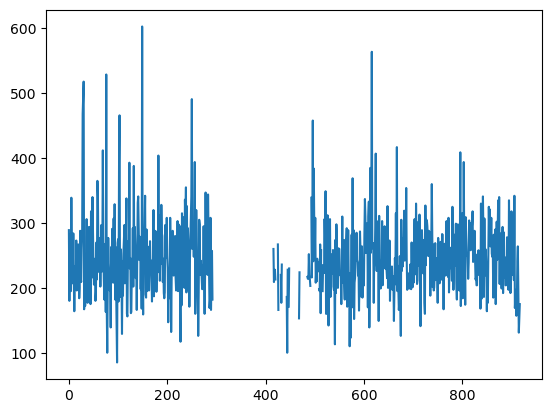

In [387]:
plt.plot(df['Cholesterol'])

### Create new data

In [432]:
df_test = df.sample(18, random_state=50)
df_test.to_csv('data/new_data.csv', index = False)
df = df.drop(df_test.index)

---

In [433]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [434]:
X.replace(to_replace=['N', 'Y'], value = [0,1], inplace = True)
X.replace(to_replace=['F', 'M'], value = [0,1], inplace = True)

In [435]:
X = pd.get_dummies(X)

In [436]:
X.replace(to_replace=[False, True], value = [0,1], inplace = True)

In [392]:
X

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,1,140,289.0,0,172,0,0.0,0,1,0,0,0,1,0,0,0,1
1,49,0,160,180.0,0,156,0,1.0,0,0,1,0,0,1,0,0,1,0
2,37,1,130,283.0,0,98,0,0.0,0,1,0,0,0,0,1,0,0,1
3,48,0,138,214.0,0,108,1,1.5,1,0,0,0,0,1,0,0,1,0
4,54,1,150,195.0,0,122,0,0.0,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,57,0,140,241.0,0,123,1,0.2,1,0,0,0,0,1,0,0,1,0
913,45,1,110,264.0,0,132,0,1.2,0,0,0,1,0,1,0,0,1,0
914,68,1,144,193.0,1,141,0,3.4,1,0,0,0,0,1,0,0,1,0
915,57,1,130,131.0,0,115,1,1.2,1,0,0,0,0,1,0,0,1,0


In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 0 to 917
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                900 non-null    int64  
 1   Sex                900 non-null    int64  
 2   RestingBP          900 non-null    int64  
 3   Cholesterol        900 non-null    int64  
 4   FastingBS          900 non-null    int64  
 5   MaxHR              900 non-null    int64  
 6   ExerciseAngina     900 non-null    int64  
 7   Oldpeak            900 non-null    float64
 8   ChestPainType_ASY  900 non-null    int64  
 9   ChestPainType_ATA  900 non-null    int64  
 10  ChestPainType_NAP  900 non-null    int64  
 11  ChestPainType_TA   900 non-null    int64  
 12  RestingECG_LVH     900 non-null    int64  
 13  RestingECG_Normal  900 non-null    int64  
 14  RestingECG_ST      900 non-null    int64  
 15  ST_Slope_Down      900 non-null    int64  
 16  ST_Slope_Flat      900 non-null

### Train test split

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=50,test_size=0.2, stratify=y)

### Scaling

In [454]:
scaler = StandardScaler().fit(X_train)

In [455]:
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

In [280]:
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train_sc, y_train)

RandomForestClassifier(random_state=50)

In [281]:
y_pred = rfc.predict(X_test_sc)

In [282]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        80
           1       0.87      0.93      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.88      0.88      0.88       180



In [446]:
X_train_sc_df = pd.DataFrame(X_train_sc, columns = X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc, columns = X_train.columns)

In [397]:
X_train_sc_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.867853,-1.925067,0.361870,NaN,1.805645,0.229528,-0.818861,-0.844111,-1.093216,-0.471605,-0.534522,4.296447,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
1,-0.180736,0.519462,-1.307297,-0.208767,1.805645,0.386620,-0.818861,-0.752609,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
2,2.231019,0.519462,1.405100,1.118261,1.805645,-0.987932,1.221208,0.985940,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,3.511885,-0.986206,-0.872004
3,-1.019607,0.519462,-0.159745,-0.208767,-0.553819,1.643353,1.221208,-0.478101,-1.093216,-0.471605,1.870829,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
4,0.658135,0.519462,-0.420552,NaN,1.805645,-1.066478,-0.818861,-0.752609,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.133841,0.519462,0.361870,-0.760259,-0.553819,-0.281020,1.221208,1.900966,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
716,-0.180736,0.519462,0.361870,2.738269,-0.553819,-0.516657,1.221208,0.985940,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
717,0.972712,0.519462,0.361870,NaN,1.805645,0.465166,-0.818861,0.985940,0.914732,-0.471605,-0.534522,-0.232750,1.909231,-1.173132,-0.508666,-0.284747,-0.986206,1.146784
718,0.133841,0.519462,-1.202974,-0.536215,1.805645,1.682626,-0.818861,-0.478101,-1.093216,2.120421,-0.534522,-0.232750,-0.523771,-1.173132,1.965926,-0.284747,-0.986206,1.146784


### Mrmr Selecting k Best

In [284]:
best_k_features = mrmr_classif(X_train_sc_df,y_train.values, K=11)

100%|██████████████████████████████████████████████████████████████████████████████████| 11/11 [00:00<00:00, 27.04it/s]


In [232]:
best_k_features

['ST_Slope_Up',
 'ChestPainType_ASY',
 'ExerciseAngina',
 'FastingBS',
 'ST_Slope_Flat',
 'Oldpeak',
 'Sex',
 'ChestPainType_ATA',
 'MaxHR',
 'Cholesterol',
 'Age']

In [285]:
X_k_train = X_train_sc_df[best_k_features]
X_k_test = X_test_sc_df[best_k_features]

In [286]:
rfc.fit(X_k_train, y_train)

RandomForestClassifier(random_state=50)

In [287]:
y_pred = rfc.predict(X_k_test)

In [288]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        80
           1       0.87      0.90      0.88       100

    accuracy                           0.87       180
   macro avg       0.87      0.86      0.86       180
weighted avg       0.87      0.87      0.87       180



### GridSearch

In [139]:
recall_scorer = make_scorer(recall_score)

In [289]:
parameters = {
    "n_estimators":[10,20,50,100,200,500,1000],
    #"max_samples":[2,5,10],
    "max_depth":[2,5,10,None],
    'criterion' :["gini", "entropy"],
    #'max_features': ["sqrt", "log2", None],
    'n_jobs':[-1]
}

CV = GridSearchCV(rfc,parameters, scoring=recall_scorer)
CV.fit(X_k_train,y_train)

KeyboardInterrupt: 

In [167]:
from tqdm import tqdm

# Define the parameter grid and the model
parameters = {
    "n_estimators":[10,20,50,100,200,500,1000],
    #"max_samples":[2,5,10],
    "max_depth":[2,5,10,None],
    'criterion' :["gini", "entropy"],
    #'max_features': ["sqrt", "log2", None],
    'n_jobs':[-1]
}

CV = GridSearchCV(rfc, parameters, scoring=recall_scorer, verbose=0)

# Wrap CV.fit with tqdm
with tqdm(total=len(parameters['n_estimators'])) as pbar:
    CV.fit(X_k_train, y_train)
    pbar.update()

 14%|███████████▊                                                                       | 1/7 [02:14<13:24, 134.05s/it]


In [ ]:
temp_rfc = CV.best_estimator_
temp_rfc

In [170]:
temp_rfc.fit(X_k_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, n_jobs=-1, random_state=50)

In [171]:
y_pred = rfc.predict(X_k_test)

In [172]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84       106
           1       0.84      0.91      0.87       119

    accuracy                           0.86       225
   macro avg       0.86      0.85      0.86       225
weighted avg       0.86      0.86      0.86       225



In [ ]:
---

In [294]:
rfc = RandomForestClassifier(random_state=50, max_depth=20,n_estimators=30)

In [295]:
rfc.fit(X_train_sc_df, y_train)

RandomForestClassifier(max_depth=20, n_estimators=30, random_state=50)

In [296]:
y_pred = rfc.predict(X_test_sc_df)

In [297]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        80
           1       0.85      0.94      0.89       100

    accuracy                           0.87       180
   macro avg       0.88      0.86      0.87       180
weighted avg       0.88      0.87      0.87       180



### Support Vector Machine

In [298]:
from sklearn import svm

In [305]:
svc = svm.SVC(random_state=50)
svc.fit(X_k_train, y_train)

SVC(random_state=50)

In [306]:
y_pred = svc.predict(X_k_test)

In [307]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        80
           1       0.86      0.94      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



In [308]:
print('Recall:', cross_val_score(svc, X_k_train, y_train, scoring='recall'))

Recall: [0.925      0.925      0.9        0.88607595 0.92405063]


### NearestNeighbors

In [310]:
from sklearn.neighbors import KNeighborsClassifier

In [320]:
recalls = []
for i in tqdm(range(2,30)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_k_train, y_train)
    y_pred = svc.predict(X_k_test)
    recalls.append(recall_score(y_test,y_pred))

100%|██████████████████████████████████████████████████████████████████████████████████| 28/28 [00:00<00:00, 73.30it/s]


In [323]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_k_train, y_train)

KNeighborsClassifier()

In [324]:
y_pred = svc.predict(X_k_test)

In [325]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86        80
           1       0.86      0.94      0.90       100

    accuracy                           0.88       180
   macro avg       0.89      0.88      0.88       180
weighted avg       0.89      0.88      0.88       180



### Confusion Matrix

In [271]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [273]:
cnf_matrix

array([[ 86,  15],
       [ 10, 114]], dtype=int64)

Text(50.722222222222214, 0.5, 'Actual Label')

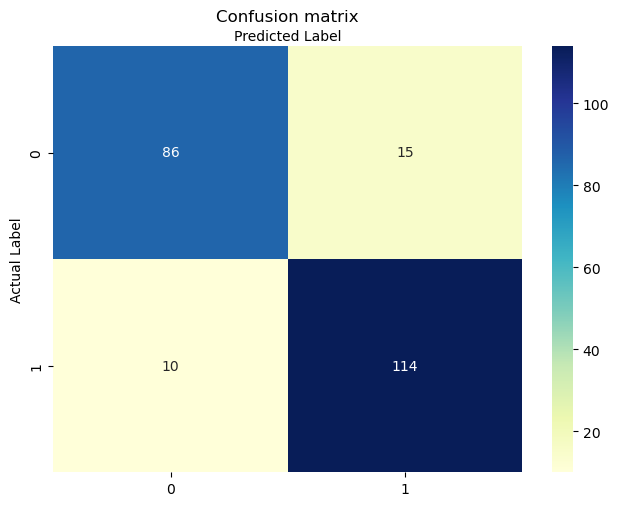

In [272]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


#Create Heatmap

sns.heatmap(pd.DataFrame(cnf_matrix), annot= True, cmap = "YlGnBu", fmt ="g")
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title("Confusion matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")

### Naive Bayes

In [329]:
from sklearn.naive_bayes import GaussianNB

In [425]:
bayes = GaussianNB()

In [426]:
bayes.fit(X_train_sc_df, y_train)

GaussianNB()

In [427]:
svc.predict(X_test_sc_df)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ChestPainType_NAP
- ChestPainType_TA
- RestingBP
- RestingECG_LVH
- RestingECG_Normal
- ...


In [422]:
y_pred = svc.predict(X_test_sc_df)
print(classification_report(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ChestPainType_NAP
- ChestPainType_TA
- RestingBP
- RestingECG_LVH
- RestingECG_Normal
- ...


---

### Logistic Regression

In [335]:
from sklearn.linear_model import LogisticRegression

In [413]:
logic = LogisticRegression(random_state=50)

In [459]:
logic.fit(X_train_sc_df, y_train)

LogisticRegression(random_state=50)

In [460]:
y_pred = svc.predict(X_test_sc_df)
print(classification_report(y_test, y_pred))

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- ChestPainType_NAP
- ChestPainType_TA
- RestingBP
- RestingECG_LVH
- RestingECG_Normal
- ...


---

In [327]:
parameters = {
    #"imputerstrategy":["median","mean"],
    "classifiern_estimators":[2,5,10,20,30,50,100,150],
    "classifiermax_depth":[2,3,4,5,6,7,8,9,10,20],
    "classifierrandom_state": [50],
    "classifier__n_jobs":[-1]
}

X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

CV = GridSearchCV(RandomForestClassifier,parameters, scoring="recall")
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50,test_size=0.2,stratify=y)
CV.fit(X_train,y_train)
y_pred = CV.predict(X_test)
print('Recall Score: ',recall_score(y_test,y_pred))
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('f1: ', f1_score(y_test, y_pred))
print('class ratios: \n', pd.Series(y_pred).value_counts()/y_pred.shape[0], '\n')
print(classification_report(y_test, y_pred))

TypeError: Cannot clone object. You should provide an instance of scikit-learn estimator instead of a class.

---

### Imputer

In [376]:
from sklearn.impute import SimpleImputer, KNNImputer

In [441]:
spl_imp = SimpleImputer(missing_values=np.nan, strategy='median')
knn_imp = KNNImputer()

In [442]:
spl_imp.fit(X_train_sc)

SimpleImputer(strategy='median')

In [456]:
X_train_sc_df = spl_imp.transform(X_train_sc)
X_test_sc_df = spl_imp.transform(X_test_sc)

In [457]:
X_train_sc_df = pd.DataFrame(X_train_sc_df, columns = X_train.columns)
X_test_sc_df = pd.DataFrame(X_test_sc_df, columns = X_test.columns)

In [458]:
X_train_sc_df

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.867853,-1.925067,0.361870,-0.105362,1.805645,0.229528,-0.818861,-0.844111,-1.093216,-0.471605,-0.534522,4.296447,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
1,-0.180736,0.519462,-1.307297,-0.208767,1.805645,0.386620,-0.818861,-0.752609,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
2,2.231019,0.519462,1.405100,1.118261,1.805645,-0.987932,1.221208,0.985940,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,3.511885,-0.986206,-0.872004
3,-1.019607,0.519462,-0.159745,-0.208767,-0.553819,1.643353,1.221208,-0.478101,-1.093216,-0.471605,1.870829,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
4,0.658135,0.519462,-0.420552,-0.105362,1.805645,-1.066478,-0.818861,-0.752609,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,-0.986206,1.146784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.133841,0.519462,0.361870,-0.760259,-0.553819,-0.281020,1.221208,1.900966,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
716,-0.180736,0.519462,0.361870,2.738269,-0.553819,-0.516657,1.221208,0.985940,0.914732,-0.471605,-0.534522,-0.232750,-0.523771,0.852419,-0.508666,-0.284747,1.013987,-0.872004
717,0.972712,0.519462,0.361870,-0.105362,1.805645,0.465166,-0.818861,0.985940,0.914732,-0.471605,-0.534522,-0.232750,1.909231,-1.173132,-0.508666,-0.284747,-0.986206,1.146784
718,0.133841,0.519462,-1.202974,-0.536215,1.805645,1.682626,-0.818861,-0.478101,-1.093216,2.120421,-0.534522,-0.232750,-0.523771,-1.173132,1.965926,-0.284747,-0.986206,1.146784
